# Classifying Names with character level RNN

In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

import os
import glob

## Building the input data

In [2]:
ROOT_DIR = '../../Data/names_data/names/*.txt'

In [3]:
def find_files(path): return glob.glob(path)

In [4]:
import unicodedata
import string

all_ascii_letters = string.ascii_letters+" .,;'"
n_letters = len(all_ascii_letters)

print(f'All ASCII letters : {all_ascii_letters}')
print(f'Total number of letters : {n_letters}')

All ASCII letters : abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'
Total number of letters : 57


In [5]:
def convert_unicode2ascii(s):
    '''
        Converts a unicode character to ASCII format
    '''
    all_character = []
    for c in unicodedata.normalize('NFD',s):
        if unicodedata.category(c) != 'Mn' and c in all_ascii_letters:
            all_character.append(c)
            
    return ''.join(all_character)
        
convert_unicode2ascii('Ślusàrski')

'Slusarski'

In [6]:
## Building the dictionary with categories and names as list

category_lines = {}
category_labels = []


for files in find_files(ROOT_DIR):
    print(f'Reading Files : {files}')
    
    category = os.path.basename(files).split('.')[0]
    
    with open(files, mode='r', encoding='UTF-8') as f:
        content = f.read().strip().split('\n')
        ascii_content = [ convert_unicode2ascii(lines) for lines in content ]
        
    category_labels.append(category)
    category_lines[category] = ascii_content

Reading Files : ../../Data/names_data/names/Czech.txt
Reading Files : ../../Data/names_data/names/German.txt
Reading Files : ../../Data/names_data/names/Arabic.txt
Reading Files : ../../Data/names_data/names/Japanese.txt
Reading Files : ../../Data/names_data/names/Chinese.txt
Reading Files : ../../Data/names_data/names/Vietnamese.txt
Reading Files : ../../Data/names_data/names/Russian.txt
Reading Files : ../../Data/names_data/names/French.txt
Reading Files : ../../Data/names_data/names/Irish.txt
Reading Files : ../../Data/names_data/names/English.txt
Reading Files : ../../Data/names_data/names/Spanish.txt
Reading Files : ../../Data/names_data/names/Greek.txt
Reading Files : ../../Data/names_data/names/Italian.txt
Reading Files : ../../Data/names_data/names/Portuguese.txt
Reading Files : ../../Data/names_data/names/Scottish.txt
Reading Files : ../../Data/names_data/names/Dutch.txt
Reading Files : ../../Data/names_data/names/Korean.txt
Reading Files : ../../Data/names_data/names/Polish.t

In [7]:
## sample content

print(category_lines['Arabic'][:5])
print(category_lines['Dutch'][-5:])

['Khoury', 'Nahas', 'Daher', 'Gerges', 'Nazari']
['Tunison', 'Tunneson', 'Vandale', 'Vandroogenbroeck', 'Vann']


In [8]:
n_categories = len(category_labels)

n_categories

18

## Converting to Tensor

In [9]:
def letter_to_index(letter):
    '''
        Finds the index of the letter from the ascii vocab
    '''
    return all_ascii_letters.find(letter)

In [10]:
letter_to_index('A')

26

In [11]:
def letter_to_tensor(letter):
    tensor = torch.zeros(1, n_letters) ## a 1xn_letters tensor of zeros
    tensor[0][letter_to_index(letter)] = 1
    return tensor

letter_to_tensor('A')

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])

In [12]:
def line_to_tensor(line):
    '''
        Converts a line into <line_length x 1 x n_letters> tensor
    '''
    
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letters in enumerate(line):
        tensor[li][0][letter_to_index(letters)] = 1
        
    return tensor

In [13]:
line_to_tensor('Rishu')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [66]:
line_to_tensor('Rama').size()

torch.Size([4, 1, 57])

## Model definition

![character_level]('/Users/rishushrivastava/Document/GitHub/MLPy/screenshots/charater_level_rnn.png')

In [23]:
class RNNModel(nn.Module):
    
    def __init__(self, input_size=57, hidden_size=128, output_size=18):
        super().__init__()
        
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
    

In [27]:
n_hidden = 128

rnn = RNNModel(n_letters, n_hidden, n_categories)

rnn

RNNModel(
  (i2h): Linear(in_features=185, out_features=128, bias=True)
  (i2o): Linear(in_features=185, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [48]:
## running the model once

input = line_to_tensor('Rishu')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.8677, -3.0123, -2.8567, -2.9087, -2.8534, -2.8953, -2.9523, -2.8881,
         -2.9486, -2.9227, -2.8419, -2.9481, -2.9013, -2.9570, -2.8020, -2.8439,
         -2.8233, -2.8305]], grad_fn=<LogSoftmaxBackward>)


In [49]:
def get_category_from_output(output):
    '''
        Returns the category from the output that the model generates
    '''
    value, indices = output.topk(1)
    category_index = indices[0]
    
    return category_labels[category_index], category_index

In [50]:
get_category_from_output(output)

('Scottish', tensor([14]))

## Training

In [51]:
import random

In [60]:
def random_choice(r):
    return r[random.randint(0, len(r)-1)]

In [61]:
def random_training_sample():
    category = random_choice(category_labels)
    line = random_choice(category_lines[category])
    category_tensor = torch.tensor([category_labels.index(category)], dtype=torch.long)
    line_tensor = line_to_tensor(line)
    return category, line, category_tensor, line_tensor

In [62]:
for i in range(10):
    category, line, category_tensor, line_tensor = random_training_sample()
    print('category =', category, '/ line =', line)

category = Polish / line = Mencher
category = Irish / line = Connolly
category = Greek / line = Gavrilopoulos
category = French / line = Colbert
category = English / line = Yang
category = Japanese / line = Tsujimura
category = Italian / line = Lagomarsino
category = Dutch / line = Andel
category = Arabic / line = Awad
category = Dutch / line = Sneijder


In [63]:
## loss function
criterions = nn.NLLLoss()

In [67]:
learning_rate = 0.005

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()
    
    rnn.zero_grad()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    loss = criterions(output, category_tensor)
    loss.backward()
    
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha = -learning_rate)
        
    return output, loss.item()

In [69]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = random_training_sample()
    output, loss = train(category_tensor, line_tensor)
    
    current_loss += loss
    
    if iter % print_every == 0:
        guess, guess_i = get_category_from_output(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))
    
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 5s) 3.3192 Bohm / Chinese ✗ (German)
10000 10% (0m 11s) 2.2485 Papageorge / Italian ✗ (Greek)
15000 15% (0m 16s) 0.5018 Okuma / Japanese ✓
20000 20% (0m 22s) 1.0636 Necchi / Italian ✓
25000 25% (0m 27s) 2.4605 Phoenix / Russian ✗ (English)
30000 30% (0m 33s) 3.1192 Leclerc / Dutch ✗ (French)
35000 35% (0m 39s) 0.1633 Filipowski / Polish ✓
40000 40% (0m 44s) 1.2079 Ra / Korean ✓
45000 45% (0m 50s) 1.0785 Cruz / Spanish ✓
50000 50% (0m 56s) 1.2590 Kase / Japanese ✓
55000 55% (1m 1s) 1.0348 Zou / Korean ✗ (Chinese)
60000 60% (1m 7s) 0.1497 Fakhoury / Arabic ✓
65000 65% (1m 12s) 0.1305 Kowalczyk / Polish ✓
70000 70% (1m 18s) 1.1870 Bazzi / Arabic ✓
75000 75% (1m 24s) 1.1512 Jijin / Russian ✓
80000 80% (1m 30s) 1.3790 Siegel / German ✓
85000 85% (1m 35s) 0.0781 Arvanitoyannis / Greek ✓
90000 90% (1m 41s) 2.0027 Fearon / Irish ✗ (English)
95000 95% (1m 46s) 0.6089 Lefevre / French ✓
100000 100% (1m 52s) 2.9567 Abel / German ✗ (English)


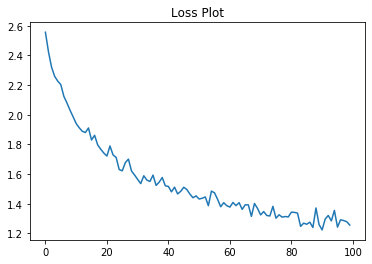

In [78]:
plt.plot(all_losses)
plt.title('Loss Plot')
plt.show()

In [72]:
torch.save(rnn.state_dict(),'classifying_names_clevel_rnn.pt')

In [76]:
# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(line_to_tensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, category_labels[category_index]))
            predictions.append([value, category_labels[category_index]])

predict('Rishu')
predict('Rama')
predict('Peter')
predict('Anna')


> Rishu
(-1.78) Scottish
(-1.84) Japanese
(-2.34) Korean

> Rama
(-1.02) Spanish
(-2.15) Portuguese
(-2.40) Italian

> Peter
(-0.98) German
(-1.79) Czech
(-1.95) Dutch

> Anna
(-1.17) Italian
(-1.30) Spanish
(-2.59) Czech
